# **Advanced Topics in Linear Regression**

---

This notebook explores advanced techniques and concepts in linear regression, including **Polynomial Regression**, **Interaction Effects**, and **Handling Multicollinearity**.

---

### **Section 1: Polynomial Regression**

#### **What is Polynomial Regression?**

Polynomial Regression extends Linear Regression by introducing polynomial terms of the input features to model non-linear relationships.

$
y = \theta_0 + \theta_1x + \theta_2x^2 + \cdots + \theta_nx^n
$

#### **Implementation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
# Generate non-linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X**2 + np.random.randn(100, 1)

In [3]:
# Polynomial Regression pipeline
polynomial_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])
polynomial_reg.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [4]:
# Predictions
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_pred = polynomial_reg.predict(X_new)

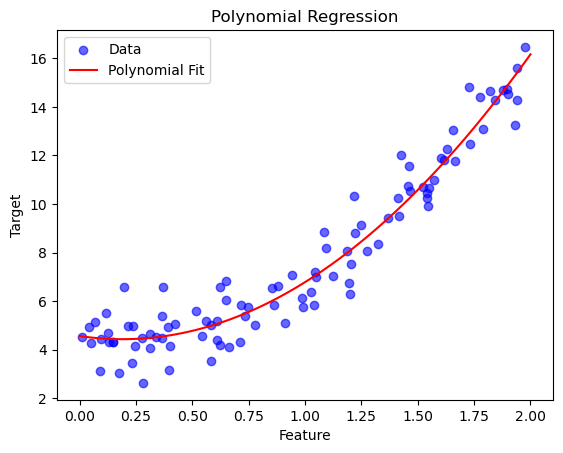

In [5]:
# Plot results
plt.scatter(X, y, label="Data", color="blue", alpha=0.6)
plt.plot(X_new, y_pred, label="Polynomial Fit", color="red")
plt.title("Polynomial Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

---

### **Section 2: Interaction Effects**

#### **What are Interaction Effects?**

Interaction effects occur when the effect of one feature on the target depends on the value of another feature. These effects can be captured by introducing interaction terms.

$
y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2
$

#### **Implementation**

In [6]:
# Generate interaction data
np.random.seed(42)
X1 = np.random.rand(100, 1)
X2 = np.random.rand(100, 1)
X = np.hstack((X1, X2))
y = 3 + 2 * X1 + 4 * X2 + 5 * X1 * X2 + np.random.randn(100, 1)

In [7]:
# Include interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

In [8]:
# Train Linear Regression with interaction terms
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [9]:
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Coefficients: [[1.58706091 4.65371004 5.14371207]]
Intercept: [2.94353522]


---

### **Section 3: Handling Multicollinearity**

#### **What is Multicollinearity?**

Multicollinearity occurs when two or more features are highly correlated, making it difficult for the model to estimate individual feature effects.

#### **Detecting Multicollinearity**

1. **Correlation Matrix**:
   Use a heatmap or pairwise correlation coefficients to detect multicollinearity.

2. **Variance Inflation Factor (VIF)**:
   $
   \text{VIF}(x_i) = \frac{1}{1 - R^2_i}
   $
   Where $(R^2_i)$ is the coefficient of determination of feature $(i)$ regressed on the other features.

<img src='images/Multicollinearity.png'>

#### **Implementation**

In [10]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
# Example dataset
np.random.seed(42)
X1 = np.random.rand(100)
X2 = 0.5 * X1 + np.random.rand(100) * 0.1  # Correlated feature
X3 = np.random.rand(100)
data = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3})

In [12]:
# Compute VIF
vif = pd.DataFrame()
vif["Feature"] = data.columns
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif

,Feature,VIF
0,X1,70.317847
1,X2,77.267890
2,X3,2.529871


#### **Solutions to Multicollinearity**

1. **Remove Highly Correlated Features**:
   Drop one of the correlated features to simplify the model.

2. **Regularization**:
   Use Ridge or Lasso Regression to penalize large coefficients.

3. **Principal Component Analysis (PCA)**:
   Transform the features into a lower-dimensional space.

---

### **Key Takeaways**

1. **Polynomial Regression**:
   - Captures non-linear relationships using polynomial terms.
   - Avoids overfitting by selecting an appropriate polynomial degree.

2. **Interaction Effects**:
   - Introduces interaction terms to capture complex relationships between features.
   - Improves model performance when features interact.

3. **Handling Multicollinearity**:
   - Detect multicollinearity using correlation matrices or VIF.
   - Apply solutions like feature removal, regularization, or dimensionality reduction.

---
---

### **Resources**

---

  - [Understanding Polynomial Regression](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491) - Explains the concept with practical examples and code.


  - [Feature Selection to Address Multicollinearity](https://machinelearningmastery.com/feature-selection-with-correlation-and-statistical-significance/) - Discusses techniques for addressing multicollinearity.
  - [Correlation Matrix in Python](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) - Example of creating and interpreting correlation matrices using Seaborn.